<a href="https://colab.research.google.com/github/archanags001/ml_projects/blob/main/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **California_Housing_Prices_Prediction**

## **STEP 0 : Data Source**

https://www.kaggle.com/camnugent/california-housing-prices

Downloaded data from the above link.

## **STEP 1: Problem Statement**

The data contains the median_house_value variable which is a continuous data and tells us about the median house price of California. Our aim here is to predict the median_house_value for a house in California, given a number of other attributes of that house.

In [39]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn import metrics

# import os
# import tarfile
# import urllib.request

## **STEP 2: Read and gather knowledge about the data**

In [40]:
# Reading the .csv file using pandas
housing_data = pd.read_csv("/content/drive/MyDrive/ML/housing.csv")
# Making a copy of the dataframe
data = housing_data.copy()

In [41]:
# Shape command will give number of samples and number of features in dataset(rows,columns)
housing_data.shape

(20640, 10)

In [42]:
# Print the first 5 rows of the dataframe.
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Few rows of the dataframe is shown above. Description of each attribute helps to understand the data better and description can be found in below link (https://www.kaggle.com/camnugent/california-housing-prices).

Description of each attribute

longitude: A measure of how far west a house is; a higher value is farther west

latitude: A measure of how far north a house is; a higher value is farther north

housingMedianAge: Median age of a house within a block; a lower number is a newer building

totalRooms: Total number of rooms within a block

totalBedrooms: Total number of bedrooms within a block

population: Total number of people residing within a block

households: Total number of households, a group of people residing within a home unit, for a block

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

medianHouseValue: Median house value for households within a block (measured in US Dollars)

oceanProximity: Location of the house w.r.t ocean/sea

In [43]:
#Describe gives statistical information about numerical columns in the dataset also we can check any missing vales in columns, 
#here total_bedrooms has got missing values
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [44]:
#info method provides information about dataset like total values in each column, null, not null, datatype, memory occupied etc
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
# lets see if there ara any duplicated values 
housing_data.duplicated().values.any()

False

In [46]:
#lets see if there are any more columns with missing values and count of missing values per column
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


From above, we can see that column "total_bedrooms" have 207 missing values, which means we’ll have to study values in that column a bit more carefully. That will help us to figure out how to handle those missing values.

## **STEP 3: Discover and Visualize the Data to Gain Insights**

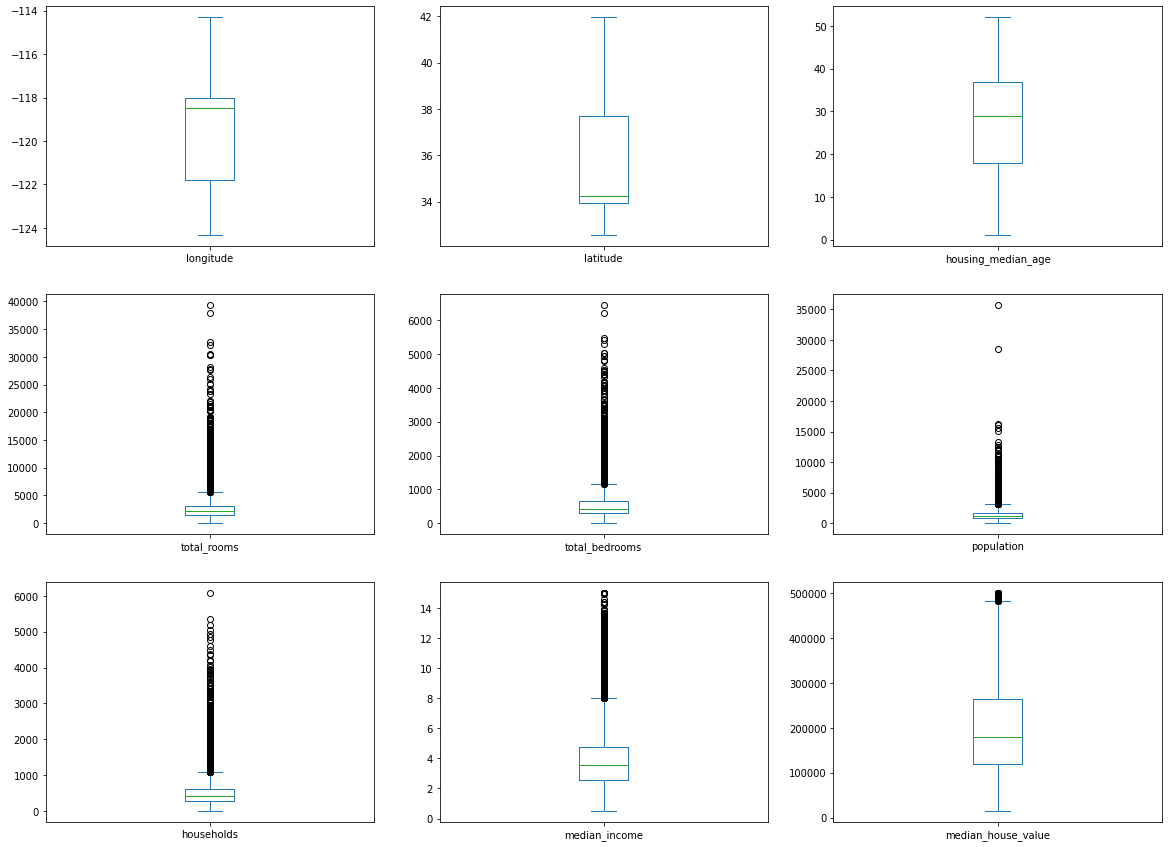

In [47]:
#Box plot provide a visual summary of the data
housing_data.plot(kind='box', figsize=(20,15), subplots=True, layout=(3,3))
plt.show()

In [48]:
# function for checking outlier 
def outlier_check(data_check):
  q1 = data_check.quantile(0.25)
  q3 = data_check.quantile(0.75)
  iqr = q3-q1
  lower_limit = q1 - 1.5*iqr
  upper_limi = q3 + 1.5*iqr
  lower_outlier = data_check < lower_limit
  upper_outlier = data_check > upper_limi
  return   data_check[(lower_outlier | upper_outlier)]

# Let's see the outliers percentage in every column
for col_name,values in housing_data.items():
  if housing_data[col_name].dtype == "float64":
    percntge = (len(outlier_check(housing_data[col_name]))/len(housing_data))*100
    print(col_name, ":", percntge,"%")

longitude : 0.0 %
latitude : 0.0 %
housing_median_age : 0.0 %
total_rooms : 6.2354651162790695 %
total_bedrooms : 6.157945736434108 %
population : 5.794573643410852 %
households : 5.910852713178294 %
median_income : 3.299418604651163 %
median_house_value : 5.188953488372093 %



From the above box plot we can see that all columns except "longitude", "latitude" and "housing_median_age" have outliers. So we calculated the outlier percentage of each column and find out that the outlier percentage is not more the 7%.

Earlier we saw that column "total_bedrooms" have 207 missing values. Since there are a few outliers in the same column, we will be using median of this column to impute the missing values using the sklearn.impute (SimpleImputer(strategy="median")) method.

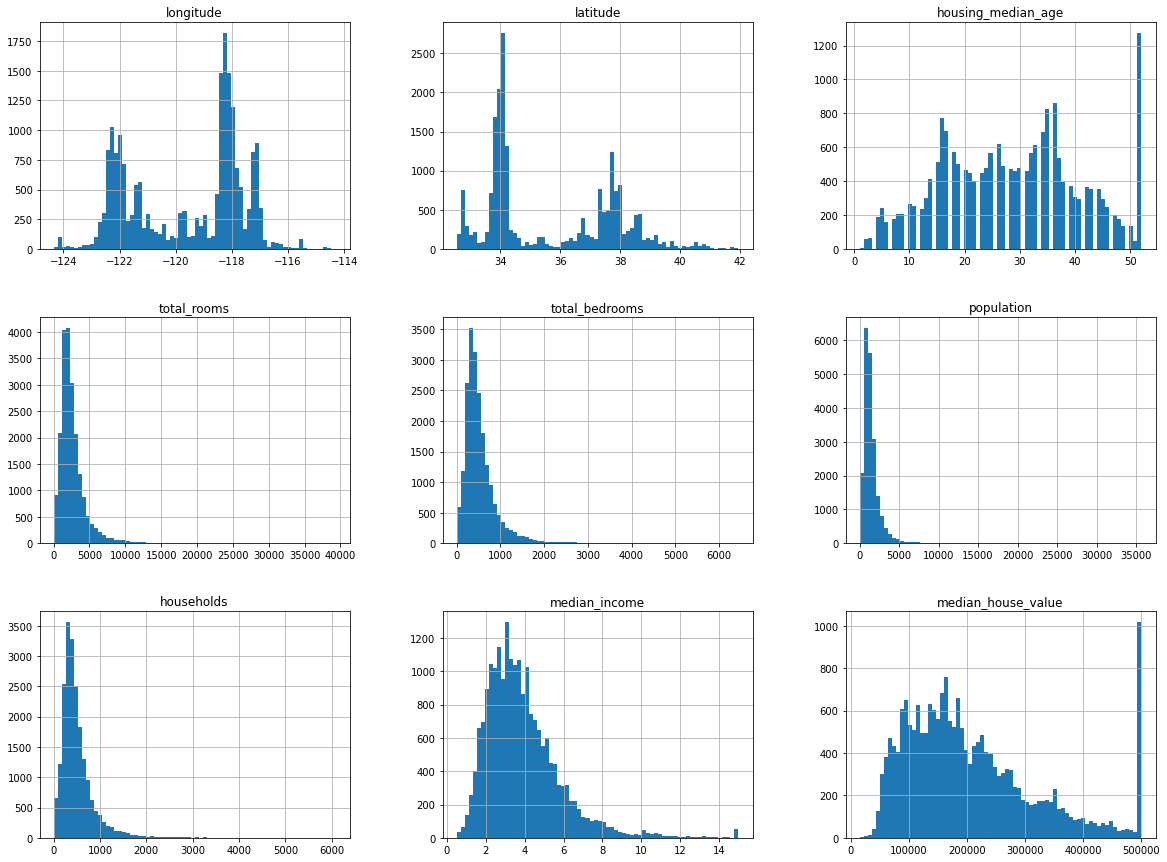

In [49]:
# Histogram gives us a much clearer idea of the distribution of the data:
housing_data.hist(bins=70, figsize=(20,15))
plt.show()

From the above histogram, Lets look at our data distribution

1. We have quite a few skewed (less centralised) data distributions.
2. "median_house_value" has an odd peak at its maximum value (around 500k), which could be an outlier.
3. "housing_median_age" having a lot of local peaks but one really odd peak at the maximum value stands out(housing_median_age= 50). Houses of certain median age is not present in data.
4. "total_rooms", "total_bedrooms", "population", "household" have similar distribution which is skewed towards smaller values.

**Looking for Correlations**

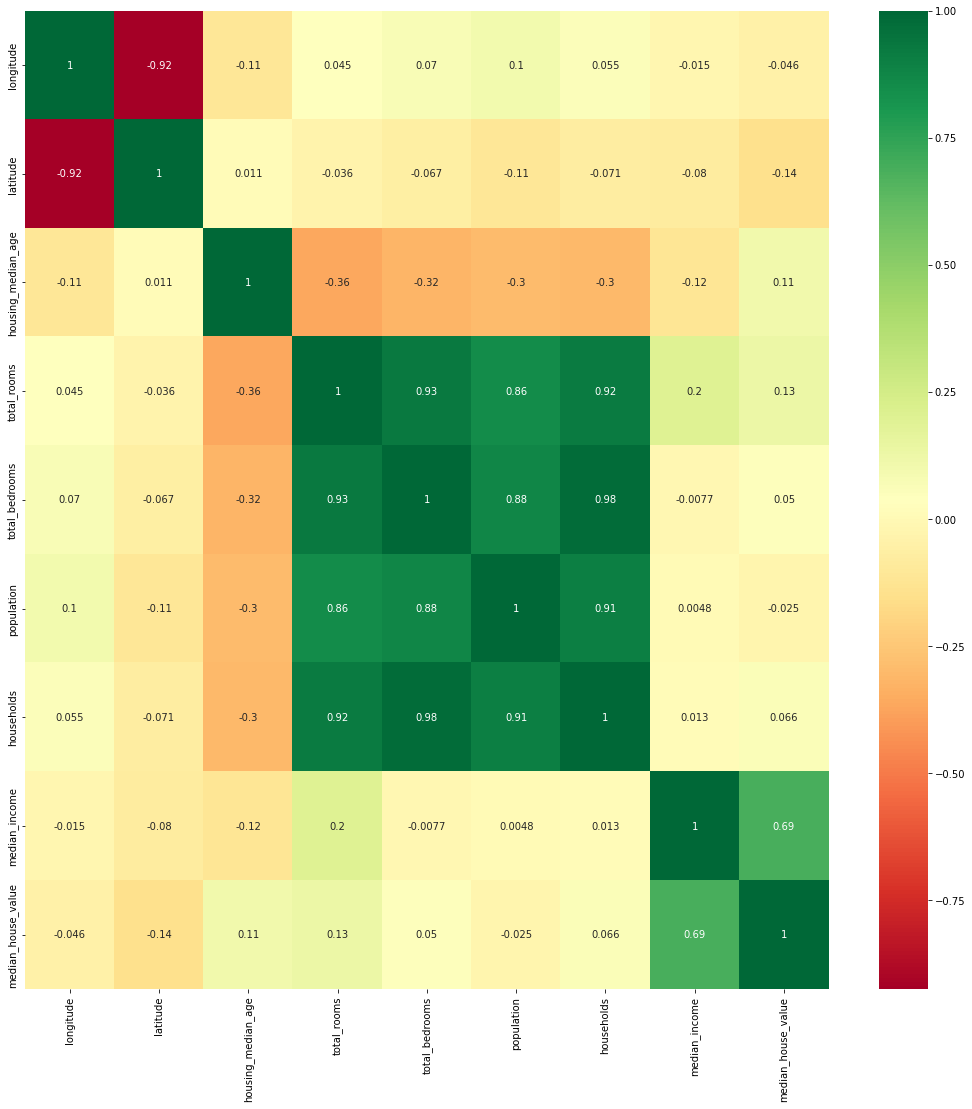

In [50]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(housing_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

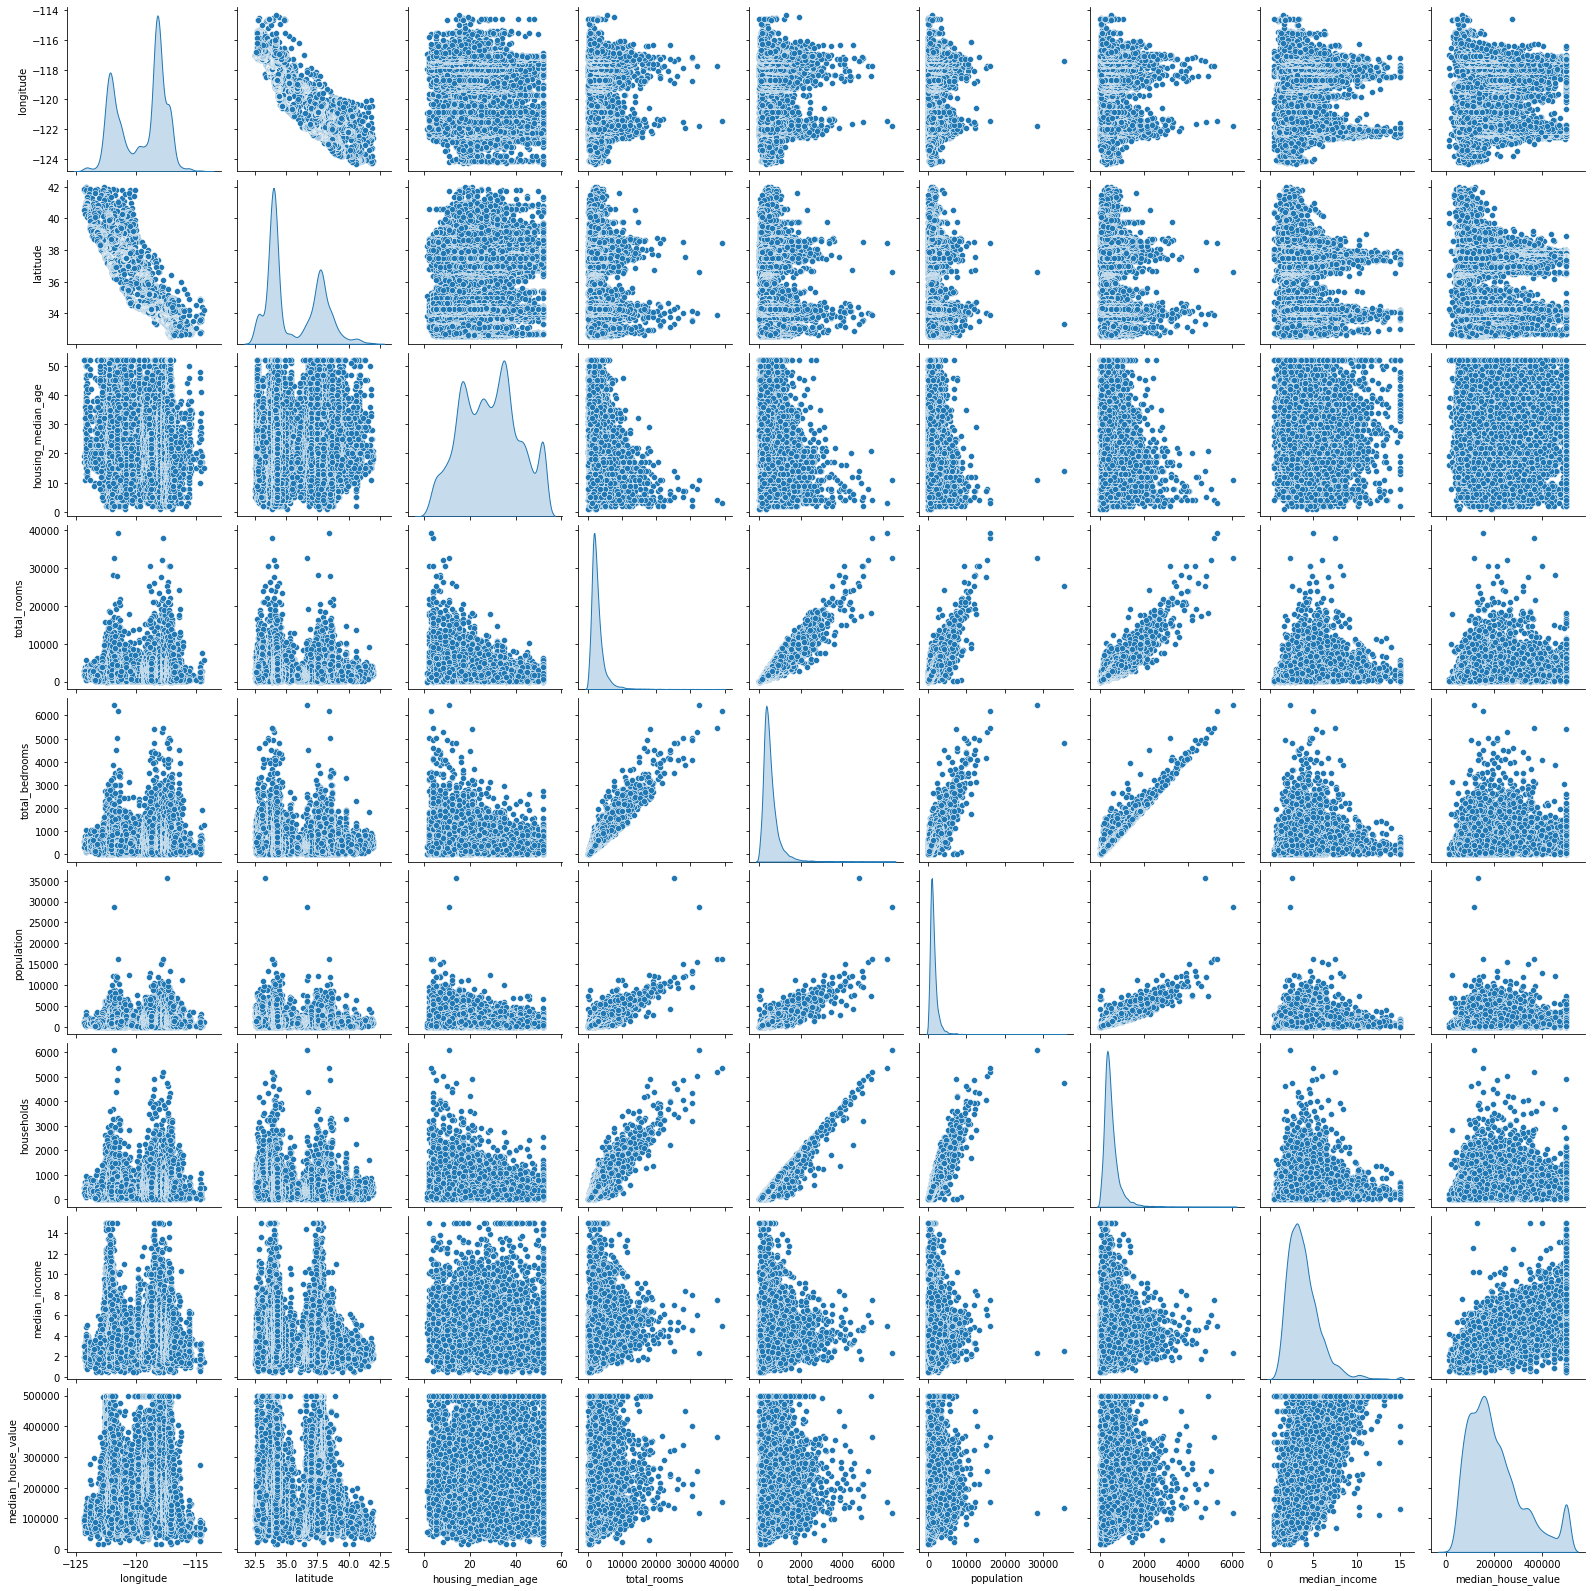

In [51]:
#pairplots to get an intuition of potential correlations 
sns.pairplot(housing_data, diag_kind="kde")

From the above heatmap and pairplot:
1. The pair plot gives a brief overview of how each variable behaves with respect to every other variable. For example, the "median_house_value" column (our target variable) is negatively correlated with the "longitude", "latitude", and population features.
2. Features have quite different axis scales,so scaling should definitely be considered.
3. Relationship between "median_house_value", "median_income" is almost linear
4. "houseing_median_age" vs "median_house_value" relation shows that the data is completely spread out all over the place

In [52]:
# correlation of features with "median_house_value" 
corr_matrix = housing_data.corr()
corr_matrix
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

From above we can see that "median_house_value" is strongly correlated to "median_income". That means "median_income" is an important feature for predicting "median_house_value".

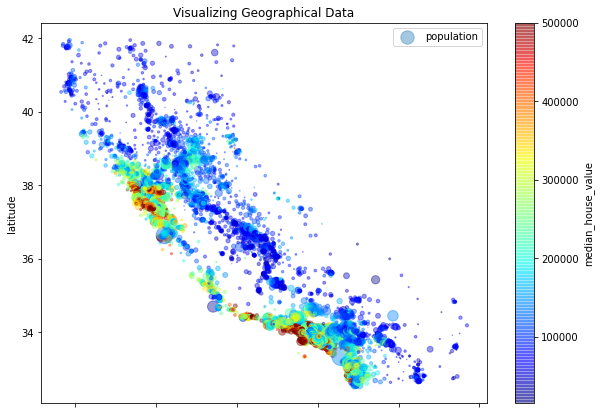

In [53]:
# Visualizing Geographical Data
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing_data['population']/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True, title="Visualizing Geographical Data")

Shown above is Geographical Data visualization : The bubble radius represents the district population and color of the bubble shows the median house value. eg: bubbles with red color shows districts with expensive houses.

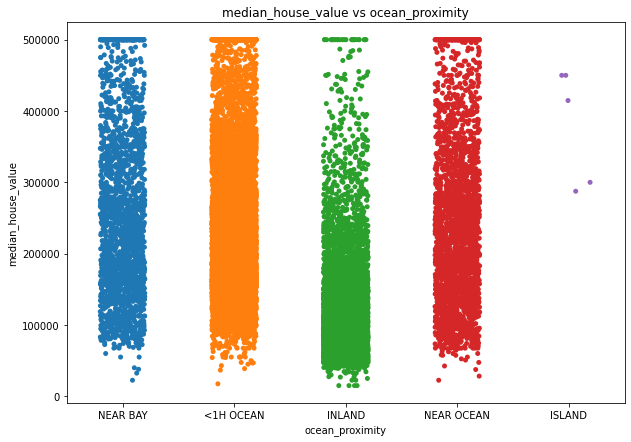

In [54]:
plt.figure(figsize=(10,7))
plt.title("median_house_value vs ocean_proximity")
sns.stripplot(data=housing_data,x='ocean_proximity',y='median_house_value',jitter=0.2)

From the above plot, we can see the number of expensive houses available in "<1H OCEAN" class compared to other class and "ISLAND" have very less number of houses

**Experimenting with Attribute Combinations**

In [55]:
# Testing new variables by checking their correlation w.r.t. "median_house_value"
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"]=housing_data["population"]/housing_data["households"]
housing_data['income per working population']=housing_data['households']-housing_data['population']

corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value               1.000000
median_income                    0.688075
rooms_per_household              0.151948
total_rooms                      0.134153
housing_median_age               0.105623
income per working population    0.066204
households                       0.065843
total_bedrooms                   0.049686
population_per_household        -0.023737
population                      -0.024650
longitude                       -0.045967
latitude                        -0.144160
bedrooms_per_room               -0.255880
Name: median_house_value, dtype: float64

"median_house_value" is very mildly correlated with the above 4 attribute combinations and "bedrooms_per_room"  and "population_per_household" are negatively correlated

## **STEP 4: Create a train dataset and test dataset**

In [56]:
# Look for the category distribution in categorical columns
##ocean_proximity distribution
housing_data["ocean_proximity"].value_counts() / len(housing_data)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

"ocean_proximity" sample distribution percentage is different in the dataset. To avoid bias while spliting the dataset to train dataset and test dataset we can use "StratifiedShuffleSplit"

In [57]:
# spliting the dataset to train dataset and test dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["ocean_proximity"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]
print(train_set.shape,test_set.shape )

(16512, 10) (4128, 10)


In [58]:
#ocean_proximity distribution in train dataset
train_set["ocean_proximity"].value_counts() / len(train_set)

<1H OCEAN     0.442648
INLAND        0.317406
NEAR OCEAN    0.128755
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [59]:
#ocean_proximity distribution in test dataset
test_set["ocean_proximity"].value_counts() / len(test_set)

<1H OCEAN     0.442587
INLAND        0.317345
NEAR OCEAN    0.128876
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

Using StratifiedShuffleSplit the proportion of distribution of "ocean_proximity" samples is almost even between train and test dataset. This discards any chances of overlapping of the train-test sets.

In [60]:
# drop labels for training set, here label is "median_house_value"
x_train = train_set.drop("median_house_value", axis=1) 
y_train = train_set["median_house_value"].copy()

# drop labels for training set, here label is "median_house_value"
x_test = test_set.drop("median_house_value", axis=1) 
y_test = test_set["median_house_value"].copy()

## **STEP 5: Prepare the Data for Machine Learning Algorithms** 


In [61]:
# column index of attribute  for attribute combinations
rooms, bedrooms, population, households, median_income = 3, 4, 5, 6, 7

class add_features(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X = pd.DataFrame(X)
        X["rooms_per_household"] = X.iloc[:, rooms] / X.iloc[:, households]
        X["population_per_household"] = X.iloc[:,population] / X.iloc[:,households]
        X['households_without_population']= X.iloc[:,households] - X.iloc[:,population]
        X["bedrooms_per_room"] = X.iloc[:,bedrooms] / X.iloc[:,rooms]
        return X

In [62]:
# Pipeline handling missing values,  adding new features and feature scaling
pipeline_num_attr = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # Handling missing values
        ('add_featur', add_features()), # adding new features
        ('std_scaler', StandardScaler()),# Feature scaling 
    ])

In [63]:
#categorical columns
cat_attribs = ["ocean_proximity"]

# droping the categorical columns
x_train_num = x_train.drop('ocean_proximity', axis=1)

# list of numeric features
num_attribs = list(x_train_num)



In [64]:
# Pipeline with above pipeline_num_attr and categorical feature handling
full_pipeline = ColumnTransformer([
        ("num", pipeline_num_attr, num_attribs), #  Pipeline with numeric features
        ("cat", OneHotEncoder(), cat_attribs),# Onehotencoding the categorical values
    ])



In [65]:
# Prepare train dataset 
x_train_prepared = full_pipeline.fit_transform(x_train)

## **STEP 6: Selecting and Training Machine Learning Models**

In [66]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor( random_state=42)))
models.append(('RFR', RandomForestRegressor(n_estimators=100, random_state=42)))
models.append(('XGB', xgboost.XGBRegressor()))
# evaluate each model in turn
scores_map = {}
for name, model in models:
    cv_results = cross_val_score(model, x_train_prepared, y_train, cv=10, scoring="neg_mean_squared_error")
    print("***** ", name, "*****")
    cv_results = np.sqrt(-cv_results)
    scores_map[name] = cv_results
    print("Scores:", cv_results)
    print("Mean:", cv_results.mean())
    print("Standard deviation:", cv_results.std())
    print("\n")

*****  LR *****
Scores: [69529.96419957 66982.70265877 69392.34851324 76643.18150297
 65827.98796761 65597.23100457 67656.83747465 69978.4303909
 69995.94906435 65200.93615786]
Mean: 68680.55689345003
Standard deviation: 3189.494973507177


*****  DTR *****
Scores: [69150.42544876 75684.74957643 68673.89563915 68975.20605668
 69032.10570864 69403.76638051 69672.33556779 70550.24311055
 72755.96994064 72756.29993632]
Mean: 70665.49973654725
Standard deviation: 2198.022203602682


*****  RFR *****
Scores: [49673.07829598 50531.62376776 49502.50139246 50212.71268555
 47961.70984937 47504.36119767 48605.45433503 52170.08907172
 51888.41495014 49625.77884676]
Mean: 49767.57243924348
Standard deviation: 1445.1665623145748


[22:16:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:33] WARNING

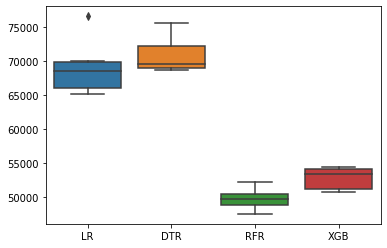

In [68]:
result = pd.DataFrame(scores_map)
sns.boxplot(data=result)

Above diagram shows that RandomForestRegressor performed well compared to LinearRegression, DecisionTreeRegressor and XGBRegressor models . In next step we can fine tune our RandomForestRegressor model 

## **STEP 7: Fine-Tune Model**

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid,
                          #  scoring='r2',
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10, 
                           
                          )

grid_search.fit(x_train_prepared, y_train)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

## **STEP 8: Evaluate model on the Test Set**

In [79]:
# preparing x_test 
x_test_prepared = full_pipeline.transform(x_test)

In [80]:
final_model = grid_search.best_estimator_

# Predicting median housing values of x_test
final_predictions = final_model.predict(x_test_prepared)

# mean_squared_error
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("mean squared error : ",final_rmse)


r2_regular = metrics.r2_score(y_test, final_predictions)
print("r2 score : " , r2_regular)



mean squared error :  48311.555825906704
r2 score :  0.826401617686955


In [81]:
# # feature_importances
feature_importances = grid_search.best_estimator_.feature_importances_
# print(feature_importances)

In [82]:
extra_attrs = ["rooms_per_household", "population_per_household","households_without_population", "bedrooms_per_room"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))
cat_col = list(full_pipeline.named_transformers_['cat'].get_feature_names(input_features=cat_attribs))


attrs = num_attrs + extra_attrs + cat_col
# print(attrs)
feature_importances = sorted(zip(feature_importances, attrs), reverse=True)

In [83]:
# plot the graph - feature importance wise
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
df_feature_importance

,feature,importance
0,0.282825,median_income
1,0.139143,ocean_proximity_<1H OCEAN
2,0.108648,rooms_per_household
3,0.088576,households_without_population
4,0.079743,latitude
5,0.079025,longitude
6,0.079011,median_house_value
7,0.039745,housing_median_age
8,0.017614,population_per_household
9,0.017394,total_rooms


Finally we evaluated our model with test dataset and got better r2 score and mean squared error. Also we found out the importance of each feature.